# Access and Visualize

Access and visualization is as per the https://dispatch.readthedocs.io web, but more specific examples are given here.

__The recommended way to use this notebook is to copy the file (with the Jupyter Lab file manager) to one of your own direcories, and then remove all cell output (context menu "Clear All Outputs"), and then walk through it, executing the cells, and considering what they do__

### Setup

To setup the Python path and go to the experiment directory, use for example a copy & paste from the ``QuickSetup for Python`` notebook (modify as needed):

In [1]:
import os
import sys
TOP=os.environ['HOME']+'/codes/dispatch/'
sys.path.append(TOP+'utilities/python')
import dispatch
import dispatch.select   as dse
import dispatch.graphics as dgr
os.chdir(TOP+'experiments/pan')

### Open a snapshot

Open a snapshot and investigate -- try typing ``sn.t<TAB>``, or ``sn.ti<TAB>`` to see tab-expand at work

In [2]:
sn=dispatch.snapshot(2,run='myrun')

In [3]:
sn.time

0.05

To show all metadata (you may want to "Enable scrolling for outputs" from the context menu, or just scroll over the long output), or else just click the "blue bar" on the left to fold the output.

In [6]:
vars(sn)

{'copy': False,
 'rundir': 'data/myrun',
 'nml_list': Namelist([('io_nml',
            Namelist([('format', 11),
                      ('ntotal', 512),
                      ('out_time', 0.025),
                      ('guard_zones', False),
                      ('time_derivs', 0),
                      ('method', 'parallel')])),
           ('snapshot_nml',
            Namelist([('ioformat', 11),
                      ('iout', 2),
                      ('time', 0.05),
                      ('ntotal', 512),
                      ('istep', 78),
                      ('mesh_type', 1),
                      ('position', array([0.9375, 0.0625, 0.6875])),
                      ('size', array([0.125, 0.125, 0.125])),
                      ('ds', array([0.0078125, 0.0078125, 0.0078125])),
                      ('box', array([1., 1., 1.])),
                      ('velocity', array([0., 0., 0.])),
                      ('level', 7),
                      ('quality', 0.0),
                      (

### Accessing patch data

The individual patches are available as a list, ``sn.patches``:

In [7]:
len(sn.patches)

512

Access the 1st patch, and list its metadata (collapse the cell output afterwards):

In [10]:
p=sn.patches[0]
vars(p)

{'id': 1,
 'rank': 0,
 'ioformat': 11,
 'iout': 3,
 'time': 0.07500000000000001,
 'ntotal': 512,
 'istep': 133,
 'mesh_type': 'Cartesian',
 'position': array([0.0625, 0.0625, 0.0625]),
 'size': array([0.125, 0.125, 0.125]),
 'ds': array([0.0078125, 0.0078125, 0.0078125]),
 'box': array([1., 1., 1.]),
 'velocity': array([0., 0., 0.]),
 'level': 7,
 'quality': 0.0,
 'gamma': 1.0,
 'ncell': array([16, 16, 16]),
 'li': array([0, 0, 0]),
 'ui': array([15, 15, 15]),
 'n': array([16, 16, 16]),
 'ng': array([2, 2, 2]),
 'gn': array([20, 20, 20]),
 'nv': 5,
 'nt': 5,
 'nw': 1,
 'kind': 'ramses_hd_patch',
 'eos': 'ideal',
 'opacity': 'none',
 'periodic': array([ True,  True,  True]),
 'guard_zones': False,
 'time_derivs': 0,
 'no_mans_land': True,
 'dtime': 0.0002883008081080098,
 'idx': <dispatch._dispatch._obj at 0x2b9cdea1b2d0>,
 'extent': array([[0.   , 0.125, 0.   , 0.125],
        [0.   , 0.125, 0.   , 0.125],
        [0.   , 0.125, 0.   , 0.125]]),
 'llc_cart': array([0., 0., 0.]),
 'unit

A function ``var`` gives access to the variables, but variable index, or by name:

In [8]:
p.var

<function dispatch._dispatch._var.<locals>.var(iv, copy=None)>

The function return a ``numpy.memmap``, which works a ``numpy.array``, but has not yet been read into memory.

In [10]:
type(p.var(0))

numpy.memmap

One can inquire and use all the ``numpy.arraay`` attributes and functions, for example:

In [13]:
p.var(0).shape

(16, 16, 16)

In [14]:
p.var(0).max()

2.2811801

In [16]:
d=p.var(0)
d[:,0,0]

memmap([1.3911651, 1.4203671, 1.4490024, 1.4766995, 1.5033338, 1.5287157,
        1.5526866, 1.5751168, 1.5958786, 1.6148192, 1.6317686, 1.6465595,
        1.659038 , 1.6690888, 1.6765884, 1.6816739], dtype=float32)

In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


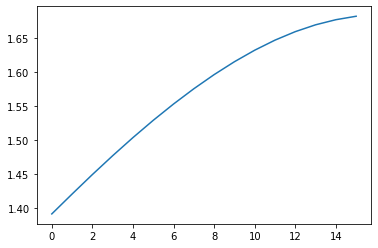

In [21]:
plot(d[:,0,0])

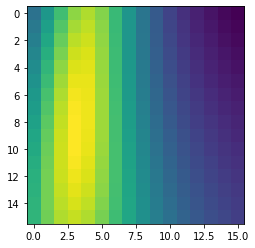

In [22]:
imshow(d[:,:,0])

To show images oriented in the Fortran way, one needs to transpose the data and put the origin at the lower corner:

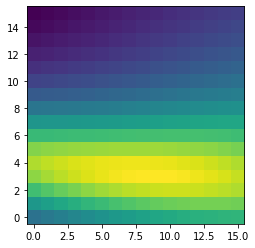

In [23]:
imshow(d[:,:,0].T,origin='lower')

The ``dispatch.graphics`` module has a shortcut for that:

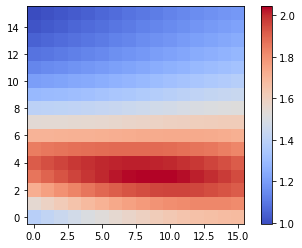

In [24]:
dgr.imshow(d[:,:,0])

As you can see, it also uses by default a different color table ('coolwarm').  This may be changed via the default parameters, since it passes all arguments on to ``pyplot.imshow``:

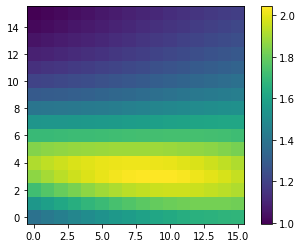

In [25]:
dgr.imshow(d[:,:,0],cmap=None)

To find other color tables, google for "matplotlig color tables", where you may find this one to be familiar (if you are an IDL user):

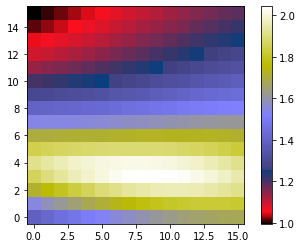

In [26]:
dgr.imshow(d[:,:,0],cmap='gist_stern')

### Compute the max and min density in each snapshot

In [54]:
for i in range(4):
    sn=dispatch.snapshot(i,run='myrun')
    dmax=0.
    dmin=1e10
    for p in sn.patches:
        d=p.var('d')              # density in the patch
        dmin=min(dmin,d.min())
        dmax=max(dmax,d.max())
    print (i,dmin,dmax)

0 1.0 1.0
1 0.9474428 1.0441262
2 0.50070375 3.5108957
3 0.119690396 69.820145


The metadata of a patch contains the position:

In [27]:
p.position

array([0.0625, 0.0625, 0.0625])

To make a selection of all patches in the same plane, use this common and compact Python construct:

In [34]:
pp=[p for p in sn.patches if p.position[2]==0.0625]

In [35]:
len(pp)

64

With the same type of construct, get all z-values:

In [50]:
zz=[p.position[2] for p in sn.patches]
zz=unique(sort(zz))
zz

array([0.0625, 0.1875, 0.3125, 0.4375, 0.5625, 0.6875, 0.8125, 0.9375])

The extent of a patch is given by the ``extent`` atttribute, which returns for example ``[xmin,xmax,ymin,ymax]`` in the 3rd element:

In [70]:
p.extent

array([[0.875, 1.   , 0.125, 0.25 ],
       [0.125, 0.25 , 0.875, 1.   ],
       [0.875, 1.   , 0.875, 1.   ]])

Given the above, we can easily display all the values in a plane of extent (0,1) in x and y:

(0, 1)

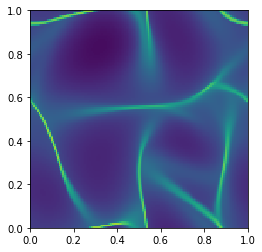

In [68]:
pp=[p for p in sn.patches if p.position[2]==zz[1]]
clf()
xlim(0,1)
ylim(0,1)
for p in pp:
    d=p.var('d')
    imshow(log(d[:,:,0].T),origin='lower',extent=p.extent[2],vmin=log(dmin),vmax=log(dmax))


By defining a small procedure that plots the exent of a patch, we can even show the individual patches:

In [78]:
def outline(e):
    x=[e[0],e[0],e[1],e[1],e[0]]
    y=[e[2],e[3],e[3],e[2],e[2]]
    plot(x,y,color='gray')

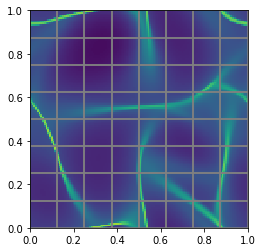

In [79]:
pp=[p for p in sn.patches if p.position[2]==zz[1]]
clf()
xlim(0,1)
ylim(0,1)
for p in pp:
    d=p.var('d')
    imshow(log(d[:,:,0].T),origin='lower',extent=p.extent[2],vmin=log(dmin),vmax=log(dmax))
    outline(p.extent[2])

### Making a more comprehensive procedure
Let's turn into a procedure, allowing choice of variable, log scale, and other options:

In [12]:
import numpy as np
import matplotlib.pyplot as pl

def my_plane(sn,v='d',log=False,ix=None,iy=None,iz=0,i=None,vmin=None,vmax=None,patches=None,colorbar=True,title=None):
    """ Procedure to make an image of a DISPATCH unigrid snapshot in a plane """

    # Choose patch plane
    if type(ix) is int:
        dir=0
        ii=ix
    elif type(iy) is int:
        dir=1
        ii=iy
    elif type(iz) is int:
        dir=2
        ii=iz
    ss=np.unique(np.sort([p.position[dir] for p in sn.patches]))
    pp=[p for p in sn.patches if p.position[dir] == ss[ii]]

    # Clear graphics and set limits
    pl.clf()
    pl.xlim(0,1)
    pl.ylim(0,1)

    # Determine min and max, if not given
    if not vmin:
        vmin=1e10
        for p in pp:
            vmin=min(vmin,p.var(v).min())
    if not vmax:
        vmax=-1e10
        for p in pp:
            vmax=max(vmax,p.var(v).max())
    vmin=np.log(vmin) if log else vmin
    vmax=np.log(vmax) if log else vmax
    
    # Choose index in patch -- mid-plane if not given
    if i is None:
        i=sn.n[dir]//2

    # Make the images
    for p in pp:
        f=np.log(p.var(v)) if log else p.var(v)
        if dir==0:
            pl.imshow(f[i,:,:].T,origin='lower',extent=p.extent[dir],vmin=vmin,vmax=vmax)
        elif dir==1:
            pl.imshow(f[:,i,:].T,origin='lower',extent=p.extent[dir],vmin=vmin,vmax=vmax)
        else:
            pl.imshow(f[:,:,i].T,origin='lower',extent=p.extent[dir],vmin=vmin,vmax=vmax)
    
    # Optionally, show patches
    if patches:
        for p in pp:
            e=p.extent[dir]
            x=[e[0],e[0],e[1],e[1],e[0]]
            y=[e[2],e[3],e[3],e[2],e[2]]
            pl.plot(x,y,color='grey')

    # how a colorbar, if not supressed
    if colorbar:
        pl.colorbar()

    # Allow custom title
    if title is None:
        vl='log('+v+')' if log else v
        title='variable:{}  plane:{} position:{}'.format(vl,dir,ss[ii])
    pl.title(title)

Let's try it out:

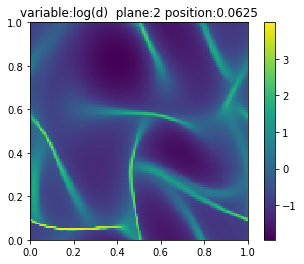

In [13]:
my_plane(sn,log=True)

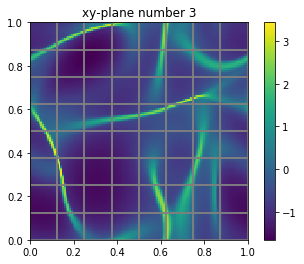

In [14]:
my_plane(sn,iz=2,log=True,title='xy-plane number 3',patches=True)

## Adding a procedure to the DISPATCH Python modules

Let's add it to the ``dispatch.graphics`` module, getting in the process insight into how Python modules are arranged:
* Use the Jupyter Lab file browser to open the directory ``utilities/python/dispatch/graphics/``
* use the '+' at top left in Jupyter Lab, choose text file, and copy & paste the procedure above into there and save (CTRL-S)
* use the context menu (on the file name or the tab name) to change the name to ``mystuff.py`` (or whatever .py name your prefer)
That's it -- you have now added a new procedure to (your clone of) the DISPATCH repository!

To check that it became available, restart the kernel in this Notebook (via the menue, or ESCAPE-00), and try it here (without executing any of the cells above):

In [1]:
import os
import sys
TOP=os.environ['HOME']+'/codes/dispatch/'
sys.path.append(TOP+'utilities/python')
import dispatch
import dispatch.select   as dse
import dispatch.graphics as dgr
os.chdir(TOP+'experiments/pan')

In [2]:
sn=dispatch.snapshot(3,run='myrun')
sn.time

0.07500000000000001

x: yz-plane


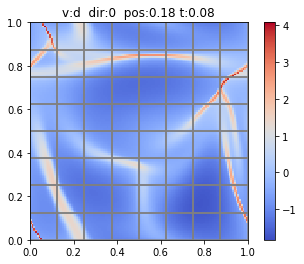

In [4]:
dgr.my_plane(sn,log=True,ix=1,i=8,patches=True)

### Saving and maintaining such private procedures
The procedure was added in a file that is not in the repository, so it does not disturb the normal maintenance of the repository (e.g. pull of updates).  

It is included in the ``dispatch.graphics`` module automatically, because it is in that directory.
If that does not happen, edit the ``dispatch/graphics/__init__.py`` file, adding this line:

On the other hand it is not available at other places you work. To make that happen, you can just copy the file to the same place there. 

To make it part of the maintined repository, you could make it a fork of the DISPATCH repository (to be described elsewhere), and use ``git push / git pull`` to distribute.